✅ 選擇的類別: ['saddle', 'steer', 'wheel']
✅ 需要篩選的類別索引: {16: 2, 6: 2, 20: 0, 21: 1}
在 train 中找到 6993 張包含指定類別的影像，已存入 ./New_dataset/train/
48678_jpg.rf.d65ef509507d2ce652955941f4f2b223.jpg
48680_jpg.rf.9f4477edc8baa53991cce2505d45fb52.jpg
48684_jpg.rf.fb7b7dc6505f071858717ad76f0954d7.jpg
48687_jpg.rf.fda20c289337a1f8844255eaa4c5c775.jpg
48690_jpg.rf.493356fc335f5e7182ff0f6cdbe3f9e9.jpg
在 valid 中找到 997 張包含指定類別的影像，已存入 ./New_dataset/valid/
48683_jpg.rf.a10c14436b8edce5b17309d3bbf2d2e0.jpg
48696_jpg.rf.73545e25b102ef9066b97f1796c4b6c0.jpg
48720_jpg.rf.44cd04d3833e4e316687f53ed3d03678.jpg
48738_jpg.rf.6ee6a05bbd7950afdeb5d5b041709b8d.jpg
48745_jpg.rf.736a5cdbc675ce1d36eb6da9ad1927a7.jpg
✅ 篩選完成，'New_dataset' 已建立！
✅ data.yaml 已建立於 ./New_dataset\data.yaml
📷 顯示 train 資料夾中的前 5 張影像，並繪製 bounding box


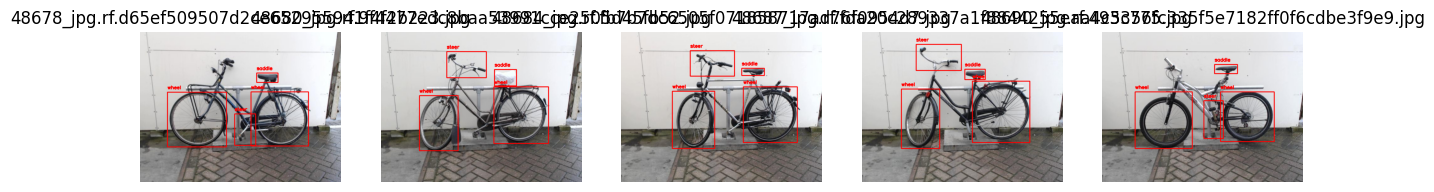

📷 顯示 valid 資料夾中的前 5 張影像，並繪製 bounding box


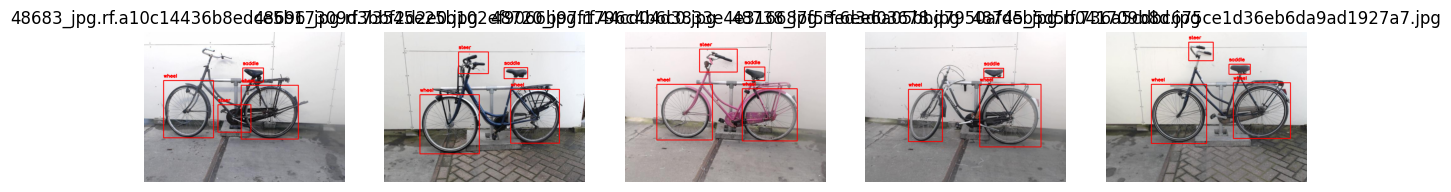

In [ ]:
import os
import yaml
import shutil
import cv2
import matplotlib.pyplot as plt

# 讀取 YAML 檔案，獲取指定類別的索引
yaml_path = "./Convert-Dataset-New-2/data.yaml"  # 確保這個路徑正確
with open(yaml_path, "r", encoding="utf-8") as file:
    data = yaml.safe_load(file)

names_list = data.get("names", [])

# **定義要篩選並合併的類別**
class_mapping = {
    "front_wheel": "wheel",
    "back_wheel": "wheel",
    "saddle": "saddle",
    "steer": "steer"
}

# **建立新的類別名稱**
selected_classes = sorted(set(class_mapping.values()))  # 移除重複值，確保類別名稱唯一
print(f"✅ 選擇的類別: {selected_classes}")

# **建立類別索引映射**
selected_indices = {names_list.index(cls): selected_classes.index(new_cls) for cls, new_cls in class_mapping.items() if cls in names_list}

if not selected_indices:
    print("❌ 找不到任何指定的類別，請檢查 data.yaml 的 names 設定！")
    exit()

print(f"✅ 需要篩選的類別索引: {selected_indices}")

# **設定輸入與輸出資料夾**
dataset_types = ["train", "valid"]
input_base_dir = "./Convert-Dataset-New-2"
output_base_dir = "./New_dataset"

# **建立新的資料夾（如果不存在）**
for dataset_type in dataset_types:
    os.makedirs(os.path.join(output_base_dir, dataset_type, "labels"), exist_ok=True)
    os.makedirs(os.path.join(output_base_dir, dataset_type, "images"), exist_ok=True)

# **開始篩選標註的影像與標註檔案**
for dataset_type in dataset_types:
    labels_dir = os.path.join(input_base_dir, dataset_type, "labels")
    images_dir = os.path.join(input_base_dir, dataset_type, "images")

    output_labels_dir = os.path.join(output_base_dir, dataset_type, "labels")
    output_images_dir = os.path.join(output_base_dir, dataset_type, "images")

    selected_images = []

    # **遍歷所有 txt 標註檔案**
    for file_name in os.listdir(labels_dir):
        if file_name.endswith(".txt"):  # 確保只讀取標註檔案
            file_path = os.path.join(labels_dir, file_name)
            new_label_path = os.path.join(output_labels_dir, file_name)  # 新標註檔案路徑

            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()

            # **篩選出只包含指定類別的標註，並且將標註 ID 重新對應**
            filtered_lines = [
                f"{selected_indices[int(line.split()[0])]} " + " ".join(line.split()[1:]) + "\n"
                for line in lines if int(line.split()[0]) in selected_indices
            ]

            if filtered_lines:  # 只有當檔案有指定類別標註時，才進行處理
                selected_images.append(file_name.replace(".txt", ".jpg"))  # 轉換為影像名稱

                # 只寫入包含指定類別的標註
                with open(new_label_path, "w", encoding="utf-8") as new_f:
                    new_f.writelines(filtered_lines)

                # **複製對應的影像檔案 (.jpg)**
                image_file = file_name.replace(".txt", ".jpg")
                image_path = os.path.join(images_dir, image_file)
                if os.path.exists(image_path):  # 確保影像檔案存在
                    shutil.copy(image_path, os.path.join(output_images_dir, image_file))

    # **列出所有包含指定類別的影像**
    print(f"在 {dataset_type} 中找到 {len(selected_images)} 張包含指定類別的影像，已存入 {output_base_dir}/{dataset_type}/")
    for img in selected_images[:5]:  # 只顯示前 5 張，避免輸出過長
        print(img)

print("✅ 篩選完成，'New_dataset' 已建立！")

# **🎯 更新 data.yaml**
train_yaml_content = f"""# YOLOv8 訓練的資料集設定
path: C:\\Users\\alex9\\Desktop\\Surveying_Camp\\New_dataset  # 資料集的根目錄
train: train/images  # 訓練圖片的路徑
val: valid/images  # 驗證圖片的路徑

# 類別數與名稱
nc: {len(selected_classes)}  # 類別數量
names: {selected_classes}  # 類別名稱
"""

yaml_path = os.path.join(output_base_dir, "data.yaml")
with open(yaml_path, "w", encoding="utf-8") as file:
    file.write(train_yaml_content)

print(f"✅ data.yaml 已建立於 {yaml_path}")

# **🎯 顯示前 5 張影像並加上 Label**
num_images_to_show = 5

# **開始展示圖片**
for dataset_type in dataset_types:
    images_dir = os.path.join(output_base_dir, dataset_type, "images")
    labels_dir = os.path.join(output_base_dir, dataset_type, "labels")

    # **取得資料夾內所有影像名稱**
    image_files = [f for f in os.listdir(images_dir) if f.endswith(".jpg")][:num_images_to_show]

    # **如果該資料夾沒有影像，則跳過**
    if not image_files:
        print(f"⚠️ {dataset_type} 資料夾中沒有找到任何影像！")
        continue

    print(f"📷 顯示 {dataset_type} 資料夾中的前 {len(image_files)} 張影像，並繪製 bounding box")

    # **建立 matplotlib 圖表**
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(images_dir, img_file)
        label_path = os.path.join(labels_dir, img_file.replace(".jpg", ".txt"))

        # **讀取影像**
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # **讀取標註檔案並畫出 bounding box**
        if os.path.exists(label_path):
            with open(label_path, "r", encoding="utf-8") as f:
                lines = f.readlines()

            for line in lines:
                data = line.strip().split()
                class_id = int(data[0])
                x_center, y_center, box_width, box_height = map(float, data[1:])

                x1 = int((x_center - box_width / 2) * w)
                y1 = int((y_center - box_height / 2) * h)
                x2 = int((x_center + box_width / 2) * w)
                y2 = int((y_center + box_height / 2) * h)

                # **繪製 bounding box（紅色框）**
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

                # **顯示類別名稱**
                label = selected_classes[class_id]
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # **顯示影像**
        plt.subplot(1, num_images_to_show, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_file)

    plt.show()

In [ ]:
# **🎯 顯示前 5 張影像並加上 Label**
num_images_to_show = 5

# **開始展示圖片**
for dataset_type in dataset_types:
    images_dir = os.path.join(output_base_dir, dataset_type, "images")
    labels_dir = os.path.join(output_base_dir, dataset_type, "labels")

    # **取得資料夾內所有影像名稱**
    image_files = [f for f in os.listdir(images_dir) if f.endswith(".jpg")][:num_images_to_show]

    # **如果該資料夾沒有影像，則跳過**
    if not image_files:
        print(f"⚠️ {dataset_type} 資料夾中沒有找到任何影像！")
        continue

    print(f"📷 顯示 {dataset_type} 資料夾中的前 {len(image_files)} 張影像，並繪製 bounding box")

    # **建立 matplotlib 圖表**
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(images_dir, img_file)
        label_path = os.path.join(labels_dir, img_file.replace(".jpg", ".txt"))

        # **讀取影像**
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # **讀取標註檔案並畫出 bounding box**
        if os.path.exists(label_path):
            with open(label_path, "r", encoding="utf-8") as f:
                lines = f.readlines()

            for line in lines:
                data = line.strip().split()
                class_id = int(data[0])
                x_center, y_center, box_width, box_height = map(float, data[1:])

                x1 = int((x_center - box_width / 2) * w)
                y1 = int((y_center - box_height / 2) * h)
                x2 = int((x_center + box_width / 2) * w)
                y2 = int((y_center + box_height / 2) * h)

                # **繪製 bounding box（紅色框）**
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

                # **顯示類別名稱**
                label = selected_classes[class_id]
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # **顯示影像**
        plt.subplot(1, num_images_to_show, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_file)

    plt.show()

In [11]:
# **根據新的類別數據建立 data.yaml**
train_yaml_content = f"""# YOLOv8 訓練的資料集設定
path: C:\\Users\\alex9\\Desktop\\Surveying_Camp\\New_dataset  # 資料集的根目錄
train: train/images  # 訓練圖片的路徑
val: valid/images  # 驗證圖片的路徑

# 類別數與名稱
nc: {len(selected_classes)}  # 類別數量
names: {selected_classes}  # 類別名稱
"""

# **指定路徑**
yaml_path = "./New_dataset/data.yaml"

# **建立並寫入 data.yaml**
with open(yaml_path, "w", encoding="utf-8") as file:
    file.write(train_yaml_content)

print(f"✅ data.yaml 已建立於 {yaml_path}")


✅ data.yaml 已建立於 ./New_dataset/data.yaml


In [12]:
from ultralytics import YOLO

# 載入 YOLOv8 預訓練模型
model = YOLO("yolo11n.pt")  # 你可以換成 yolov8s.pt 或其他版本

# 開始訓練
model.train(data="./New_dataset/data.yaml", epochs=20, batch=16, imgsz=640, mosaic=1.0)

New https://pypi.org/project/ultralytics/8.3.84 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.9.21 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=./New_dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

train: Scanning C:\Users\alex9\Desktop\Surveying_Camp\New_dataset\train\labels... 6993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6993/6993 [00:17<00:00, 396.13it/s]


train: New cache created: C:\Users\alex9\Desktop\Surveying_Camp\New_dataset\train\labels.cache


val: Scanning C:\Users\alex9\Desktop\Surveying_Camp\New_dataset\valid\labels... 997 images, 0 backgrounds, 0 corrupt: 100%|██████████| 997/997 [00:04<00:00, 236.84it/s]


val: New cache created: C:\Users\alex9\Desktop\Surveying_Camp\New_dataset\valid\labels.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.85G      1.229      1.278      1.216          6        640: 100%|██████████| 438/438 [02:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.88it/s]


                   all        997       3957      0.802      0.855      0.853      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.94G      1.175     0.8058      1.187          4        640: 100%|██████████| 438/438 [01:56<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.22it/s]

                   all        997       3957      0.845      0.882      0.863      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.93G      1.163     0.7377      1.183          4        640: 100%|██████████| 438/438 [02:11<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.77it/s]

                   all        997       3957      0.885      0.894      0.881      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.89G      1.151     0.7096      1.182          5        640: 100%|██████████| 438/438 [01:58<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]


                   all        997       3957      0.894      0.905      0.904      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       3.9G      1.136     0.6823      1.174          5        640: 100%|██████████| 438/438 [01:58<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.16it/s]

                   all        997       3957      0.869      0.882      0.891      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.88G       1.13     0.6716      1.176         82        640:  88%|████████▊ | 384/438 [01:39<00:13,  3.86it/s]


KeyboardInterrupt: 

In [ ]:
final_model = YOLO("./runs/detect/train/weights/last.pt")

# 設定輸入影像資料夾
input_folder = "./seg_non-overlapping"

# 設定輸出結果資料夾
output_folder = "./yolo_output"

# 如果資料夾不存在，則建立它
os.makedirs(output_folder, exist_ok=True)

# 進行影像辨識並存檔
results = final_model.predict(source=input_folder, save=True, project=output_folder, name="result")

# 顯示辨識結果的檔案
output_results = "./yolo_output"
print("辨識結果存放於:", output_results)
print("包含的檔案:", os.listdir(output_results))


image 1/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_0.jpg: 480x640 (no detections), 12.8ms
image 2/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_1.jpg: 480x640 (no detections), 10.2ms
image 3/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_10.jpg: 480x640 (no detections), 9.5ms
image 4/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_100.jpg: 480x640 (no detections), 10.4ms
image 5/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_101.jpg: 480x640 (no detections), 9.3ms
image 6/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_102.jpg: 480x640 (no detections), 11.6ms
image 7/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_103.jpg: 480x640 (no detections), 9.8ms
image 8/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_104.jpg: 480x640 (no detections), 8.6ms
image 9/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_105.jpg: 480x640 (no detections), 9.4ms
image 10/149 c:\Users\alex9\Desktop\Surveying_Camp\seg\mask_106.jpg: 480x640 (no detections), 8.3ms
image 11/

In [14]:
# 設定輸入影像資料夾
test_folder = "./胡耀"

# 設定輸出結果資料夾
test_output_folder = "./胡耀_test"

# 如果資料夾不存在，則建立它
os.makedirs(test_output_folder, exist_ok=True)

test_model = YOLO("./runs/detect/train2/weights/last.pt")

# 進行影像辨識並存檔
results = test_model.predict(source=test_folder, save=True, project=test_output_folder, name="yolo_results")

# 顯示辨識結果的檔案
output_results = "./胡耀_test/yolo_results"
print("辨識結果存放於:", output_results)
print("包含的檔案:", os.listdir(output_results))


image 1/29 c:\Users\alex9\Desktop\Surveying_Camp\\20250220_163149.jpg: 480x640 (no detections), 42.0ms
requirements: Ultralytics requirement ['pillow-heif'] not found, attempting AutoUpdate...
   ---------------------------------------- 8.7/8.7 MB 1.9 MB/s eta 0:00:00

requirements: AutoUpdate success  8.2s, installed 1 package: ['pillow-heif']
requirements:  Restart runtime or rerun command for updates to take effect

image 2/29 c:\Users\alex9\Desktop\Surveying_Camp\\IMG_7469.HEIC: 480x640 (no detections), 10.1ms
image 3/29 c:\Users\alex9\Desktop\Surveying_Camp\\SL01_1.jpg: 480x640 (no detections), 10.5ms
image 4/29 c:\Users\alex9\Desktop\Surveying_Camp\\SL01_3.jpg: 640x480 2 wheels, 38.9ms
image 5/29 c:\Users\alex9\Desktop\Surveying_Camp\\SL01_4.jpg: 640x480 1 wheel, 11.5ms
image 6/29 c:\Users\alex9\Desktop\Surveying_Camp\\SL02_1.jpg: 480x640 2 wheels, 9.7ms
image 7/29 c:\Users\alex9\Desktop\Surveying_Camp\\SL02_2.jpg: 640x480 1 wheel, 12.5ms
image 8/29 c:\Users\alex9\Desktop\Survey